<a href="https://colab.research.google.com/github/YashJibole/age-and-gender-detection-project/blob/main/wb_traffic_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet


In [3]:
from google.colab import files
upload = files.upload()

for fn in upload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(upload[fn])))
traffic = pd.read_csv(fn)
traffic.head()

Saving traffic.csv to traffic.csv
User uploaded file "traffic.csv" with length 8873 bytes


,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


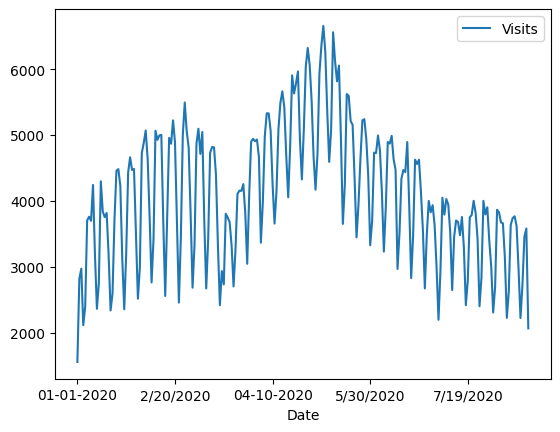

In [4]:
traffic.set_index('Date').plot();

In [5]:
traffic.columns = ["ds", "y"]
traffic.head()

,ds,y
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [6]:
updates = pd.DataFrame({
  'holiday': 'Core Update',
  'ds': pd.to_datetime(['2015-07-17', '2016-01-08',
                        '2016-09-27', '2017-03-08', '2017-07-09', '2018-03-08', '2018-04-17',
                        '2018-08-01', '2019-03-12', '2019-06-03', '2019-09-24', '2019-10-25',
                        '2019-12-09', '2020-01-13', '2020-05-04', '2020-12-3', '2021-6-3', '2021-7-12', '2021-11-18','2022-05-26','2022-06-1', '2022-09-13','2023-05-15']),
  'lower_window': 0,
  'upper_window': 14,
})
updates.head()

,holiday,ds,lower_window,upper_window
0,Core Update,2015-07-17,0,14
1,Core Update,2016-01-08,0,14
2,Core Update,2016-09-27,0,14
3,Core Update,2017-03-08,0,14
4,Core Update,2017-07-09,0,14


In [7]:
# Python
m = Prophet()
m.fit(traffic)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66v1zafm/21_f1mfa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66v1zafm/fh0uq8o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31901', 'data', 'file=/tmp/tmp66v1zafm/21_f1mfa.json', 'init=/tmp/tmp66v1zafm/fh0uq8o2.json', 'output', 'file=/tmp/tmp66v1zafm/prophet_modelj6c0ip66/prophet_model-20240128121158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
592,2021-08-15
593,2021-08-16
594,2021-08-17
595,2021-08-18
596,2021-08-19


In [9]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
592,2021-08-15,-5689.112569,-9024.726449,-2031.507503
593,2021-08-16,-4639.192836,-8074.145202,-835.663340
594,2021-08-17,-4556.939199,-7964.124077,-796.891131
595,2021-08-18,-4692.753701,-8132.940361,-886.707847
596,2021-08-19,-4747.055183,-8172.817070,-897.247690


In [10]:
# Exporting The Forecast

from google.colab import files

# We set the variable forthe name of the CSV where we will store the new MDs
forecastcsv = 'forecast.csv'
print("output csv name: ", forecastcsv)

forecast.to_csv(forecastcsv, encoding='utf-8', index=False)
print("Saving results on:", forecastcsv)
files.download(forecastcsv)

output csv name:  forecast.csv
Saving results on: forecast.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

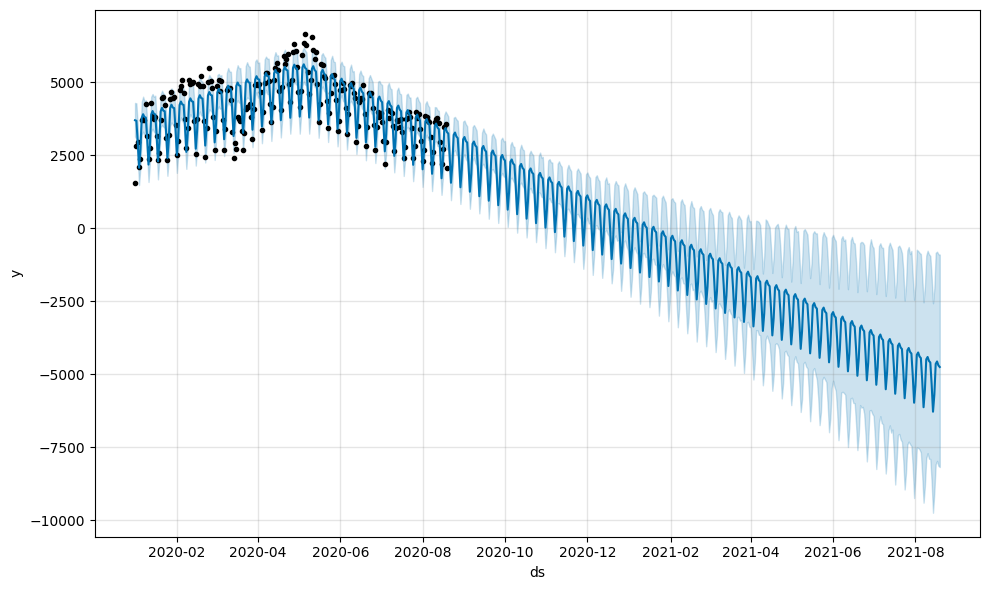

In [11]:
# Python
fig1 = m.plot(forecast)

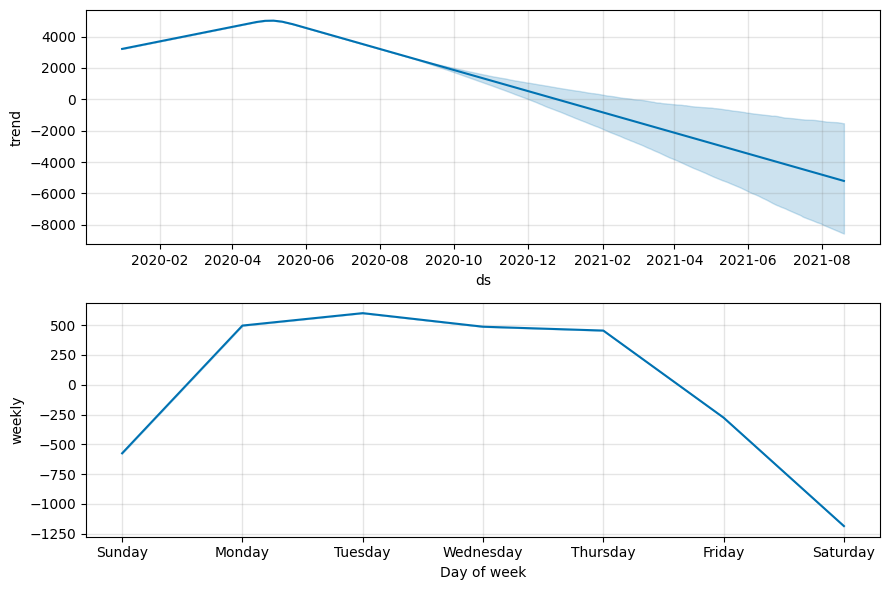

In [12]:
# Python
fig2 = m.plot_components(forecast)

In [13]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [14]:
# Python
plot_components_plotly(m, forecast)
